In [21]:
%config InlineBackend.figure_formats = ['svg']
%matplotlib inline
# Alternative plotting backend for interative data exploration
# %matplotlib notebook

from coronavirus import overview, fetch_deaths, fetch_cases

# If you want to edit the source in the notebook, try "%load coronavirus.py" 
# and comment out the import statement above.

import ipywidgets as widgets
from IPython.display import HTML

import numpy as np
import matplotlib.pyplot as plt

In [22]:
EXPLANATION = """\
<div class="app-sidebar">
<p><em>Coronavirus Numbers per Country.</em><p>

<p>Select which country to plot the coronavirus numbers for.</p>

<p>Code used from  <a href="https://github.com/fangohr/coronavirus-2020/blob/master/index.ipynb">
Hans Fangohr's coronavirus-2020 repository</a>.</p>
</div>
"""

In [23]:
HTML("""\
<style>
.app-subtitle {
    font-size: 1.5em;
}

.app-subtitle a {
    color: #106ba3;
}

.app-subtitle a:hover {
    text-decoration: underline;
}

.app-sidebar p {
    margin-bottom: 1em;
    line-height: 1.7;
}

.app-sidebar a {
    color: #106ba3;
}

.app-sidebar a:hover {
    text-decoration: underline;
}
</style>
""")

In [24]:
class App:
    
    def __init__(self):
        self._deaths = fetch_deaths()
        self._cases = fetch_cases()
        available_countries = np.unique(self._cases.index.values)
        self._country_dropdown = self._create_dropdown(available_countries, np.argwhere(available_countries =="Germany")[0][0])
        self._plot_container = widgets.Output()
        _app_container = widgets.VBox([
            widgets.HBox([self._country_dropdown]),
            self._plot_container
        ], layout=widgets.Layout(align_items='center', flex='2 0 auto'))
        self.container = widgets.VBox([
            widgets.HTML(
                (
                    '<h1>Coronavirus Country Status</h1>'
                    # '<h2 class="app-subtitle"><a href="https://github.com/pbugnion/voila-gallery/blob/master/country-indicators/index.ipynb">Link to code</a></h2>'
                ), 
                layout=widgets.Layout(margin='0 0 5em 0')
            ),
            widgets.HBox([
                _app_container, 
                widgets.HTML(EXPLANATION, layout=widgets.Layout(margin='0 0 0 2em'))
            ])
        ], layout=widgets.Layout(flex='1 1 auto', margin='0 auto 0 auto', max_width='1024px'))
        self._update_app()

    def _create_dropdown(self, indicators, initial_index):
        dropdown = widgets.Dropdown(options=indicators, value=indicators[initial_index])
        dropdown.observe(self._on_change, names=['value'])
        return dropdown

    def _create_plot(self, country):
        self._overview(country)

    def _on_change(self, _):
        self._update_app()

    def _overview(self, country):
        return overview(country)


    def _update_app(self):
        country = self._country_dropdown.value
        self._plot_container.clear_output(wait=True)
        with self._plot_container:
            self._create_plot(country)
            plt.show()

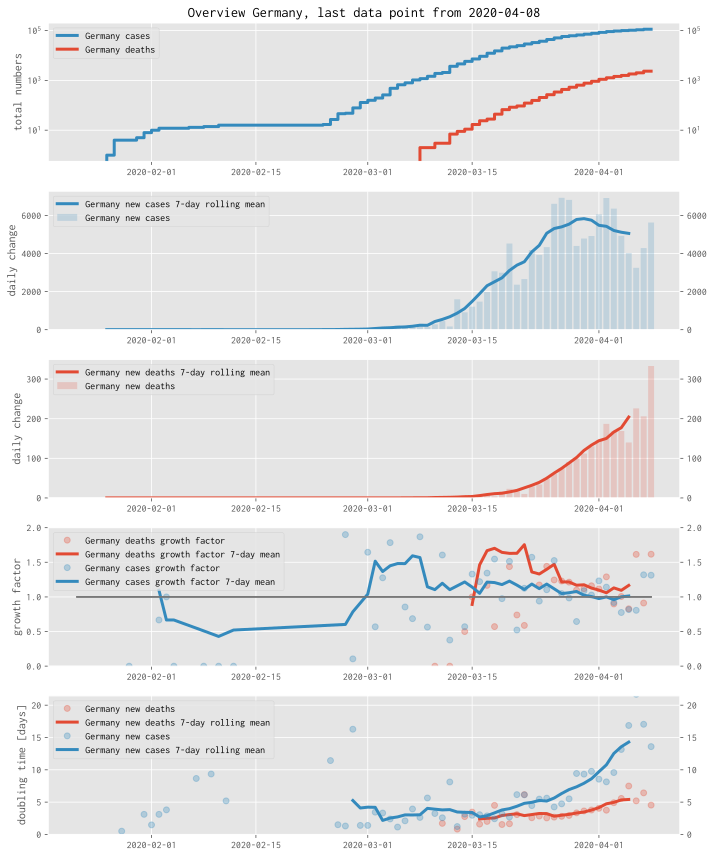

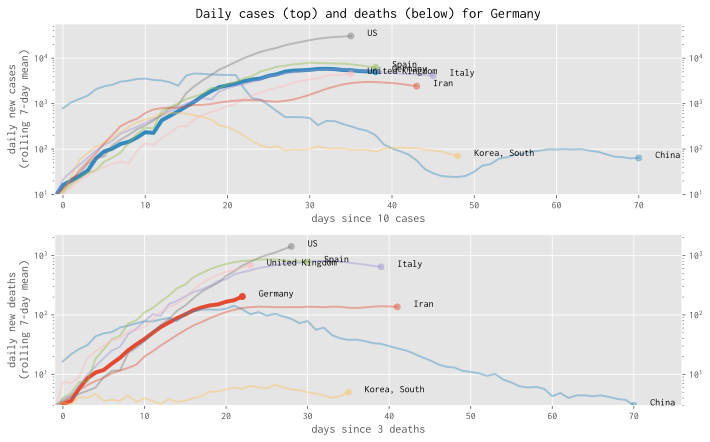

In [25]:
app = App()

app.container